# X-ray luminosity functions of AGN in the ERASS survey

Import the necessary packages and functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sys
sys.path.append('../../')
from scripts.luminosity_functions import XrayLuminosityFunction, ldde_hasinger_soft_cutoff, ldde_aird_hard, G08_best_fit_hard, G08_best_fit_soft, L210_to_L052_conv
from scripts.utils import set_mpl
set_mpl()

path2plots = './plots/'

set palette to pastel
set matplotlib rc
set palette to pastel
set matplotlib rc


## Plot distribution of AGN in luminosity and redshift

To compare with the results of Kolidzig et al. (2013)

### dNdz

dNdz calculating: 100%|██████████| 100/100 [00:00<00:00, 174.49it/s]
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


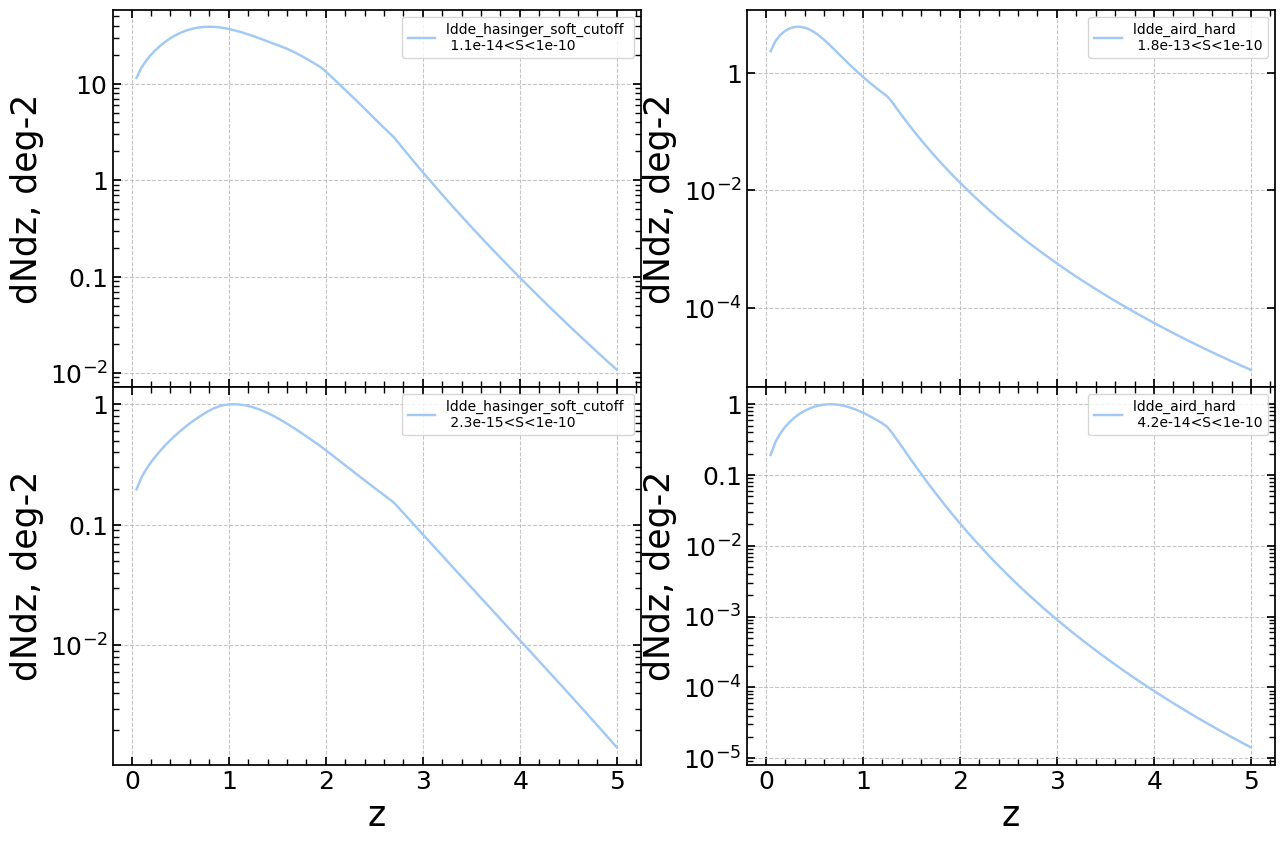

In [4]:
Slim_soft = 1.1e-14 #soft band sensitivity
Slim_soft_pole = 0.23e-14 #soft band sensitivity in poles
Slim_hard = 18e-14 #hard band sensitivity
Slim_hard_pole = 4.2e-14 #hard band sensitivity in poles

zarr = np.linspace(0.05, 5, 100)

xlf_soft=XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff)
xlf_hard = XrayLuminosityFunction(xlf=ldde_aird_hard)

fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.0)
plt.subplots_adjust(wspace=0.2)
rows, cols = 2, 2
# (rows,cols), (y,x) <- those are coordinates of an axis in subplots
ax_soft_sky = plt.subplot2grid((rows, cols), (0, 0), rowspan=1, colspan=1)
ax_soft_pole = plt.subplot2grid((rows, cols), (1, 0), rowspan=1, colspan=1, sharex = ax_soft_sky)
ax_hard_sky = plt.subplot2grid((rows, cols), (0, 1), rowspan=1, colspan=1)
ax_hard_pole = plt.subplot2grid((rows, cols), (1, 1), rowspan=1, colspan=1, sharex = ax_hard_sky)


xlf_soft.dNdz(Slim = Slim_soft, zarr = zarr, plot_ax=ax_soft_sky);
xlf_soft.dNdz(Slim = Slim_soft_pole, zarr = zarr, plot_ax=ax_soft_pole, norm=True);



xlf_hard.dNdz(Slim = Slim_hard, zarr = zarr, plot_ax=ax_hard_sky);
xlf_hard.dNdz(Slim = Slim_hard_pole, zarr = zarr, plot_ax=ax_hard_pole, norm = True);


for ax in [ax_soft_sky, ax_soft_pole, ax_hard_pole, ax_hard_sky]:
    ax.set_xlabel('z')
    ax.set_ylabel('dNdz, deg-2')
    ax.legend(fontsize = 10)


fig.savefig(path2plots+'AGN_dndz.png')

### dNdL

dNdL calculating: 100%|██████████| 100/100 [00:00<00:00, 217.78it/s]


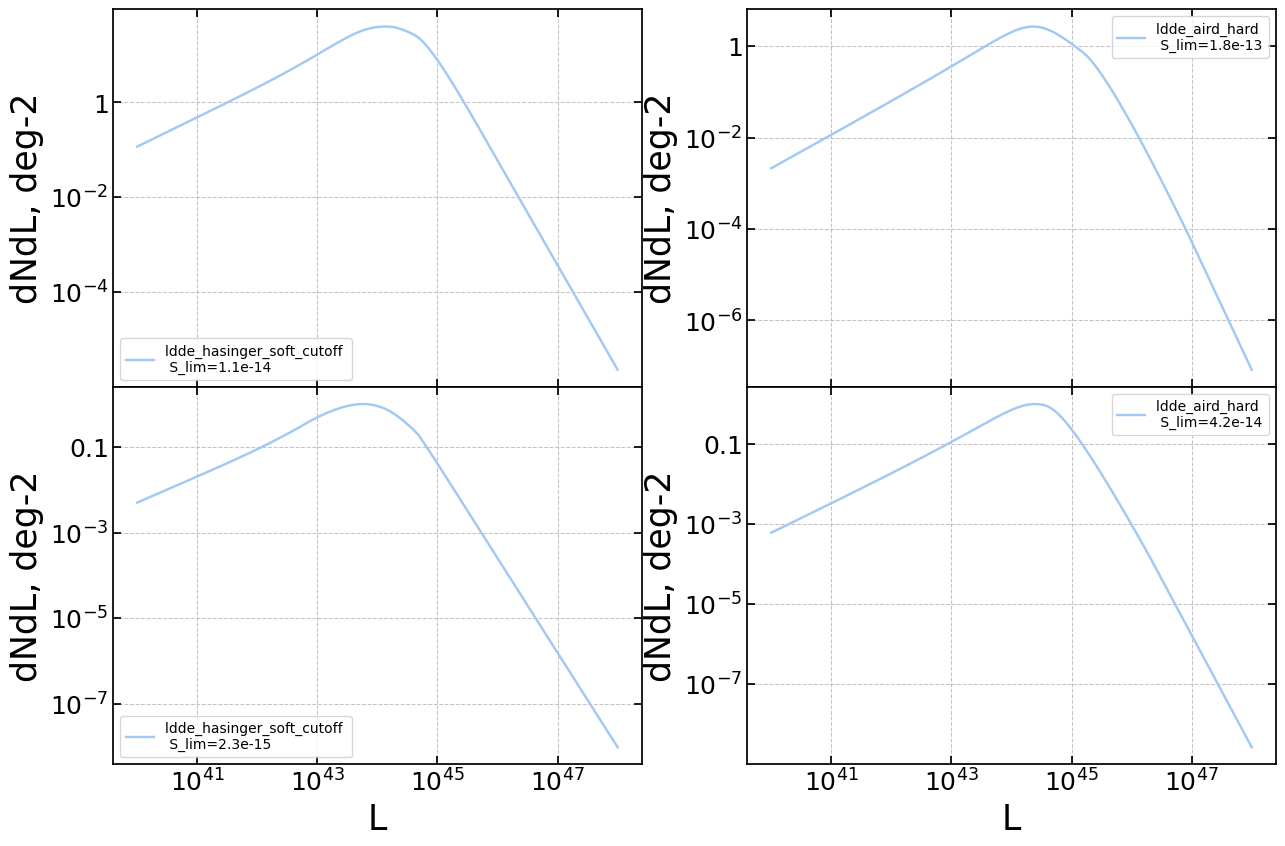

In [5]:
Slim_soft = 1.1e-14 #soft band sensitivity
Slim_soft_pole = 0.23e-14 #soft band sensitivity in poles
Slim_hard = 18e-14 #hard band sensitivity
Slim_hard_pole = 4.2e-14 #hard band sensitivity in poles

Larr = np.geomspace(1e40, 1e48, 100)

xlf_soft=XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff)
xlf_hard = XrayLuminosityFunction(xlf=ldde_aird_hard)

fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.0)
plt.subplots_adjust(wspace=0.2)
rows, cols = 2, 2
# (rows,cols), (y,x) <- those are coordinates of an axis in subplots
ax_soft_sky = plt.subplot2grid((rows, cols), (0, 0), rowspan=1, colspan=1)
ax_soft_pole = plt.subplot2grid((rows, cols), (1, 0), rowspan=1, colspan=1, sharex = ax_soft_sky)
ax_hard_sky = plt.subplot2grid((rows, cols), (0, 1), rowspan=1, colspan=1)
ax_hard_pole = plt.subplot2grid((rows, cols), (1, 1), rowspan=1, colspan=1, sharex = ax_hard_sky)


xlf_soft.dNdLogL(Slim = Slim_soft, Larr = Larr, plot_ax=ax_soft_sky);
xlf_soft.dNdLogL(Slim = Slim_soft_pole, Larr = Larr, plot_ax=ax_soft_pole, norm=True);



xlf_hard.dNdLogL(Slim = Slim_hard, Larr = Larr, plot_ax=ax_hard_sky);
xlf_hard.dNdLogL(Slim = Slim_hard_pole, Larr = Larr, plot_ax=ax_hard_pole, norm = True);


for ax in [ax_soft_sky, ax_soft_pole, ax_hard_pole, ax_hard_sky]:
    ax.set_xlabel('L')
    ax.set_ylabel('dNdL, deg-2')
    ax.legend(fontsize = 10)


fig.savefig(path2plots+'AGN_dndL.png')

### LogNlogS

dNdz calculating: 100%|██████████| 300/300 [00:01<00:00, 278.66it/s]
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


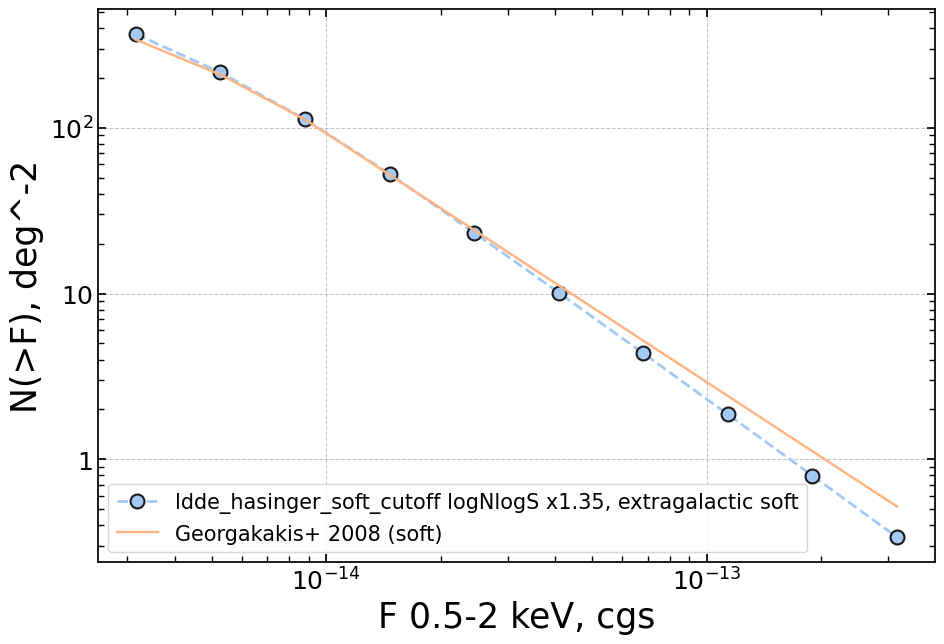

In [6]:
#%matplotlib auto
xlf_soft=XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff)

fig,  ax =  plt.subplots( figsize = (10,7), sharex=False)

Sarr = np.logspace(-14.5, -12.5, 10)
_, logNlogS_soft = xlf_soft.logNlogS(Sarr)

ax.loglog(Sarr, logNlogS_soft*1.35, 'o--', lw=2, label=f'{xlf_soft.name} logNlogS x1.35, extragalactic soft')
ax.loglog(Sarr,G08_best_fit_soft(Sarr),'-',label='Georgakakis+ 2008 (soft)')

ax.set_xlabel('F 0.5-2 keV, cgs')
ax.set_ylabel('N(>F), deg^-2')
ax.legend()
fig.tight_layout()
fig.savefig(path2plots+'AGN_logNlogS_soft.png')

dNdz calculating: 100%|██████████| 300/300 [00:01<00:00, 285.61it/s]


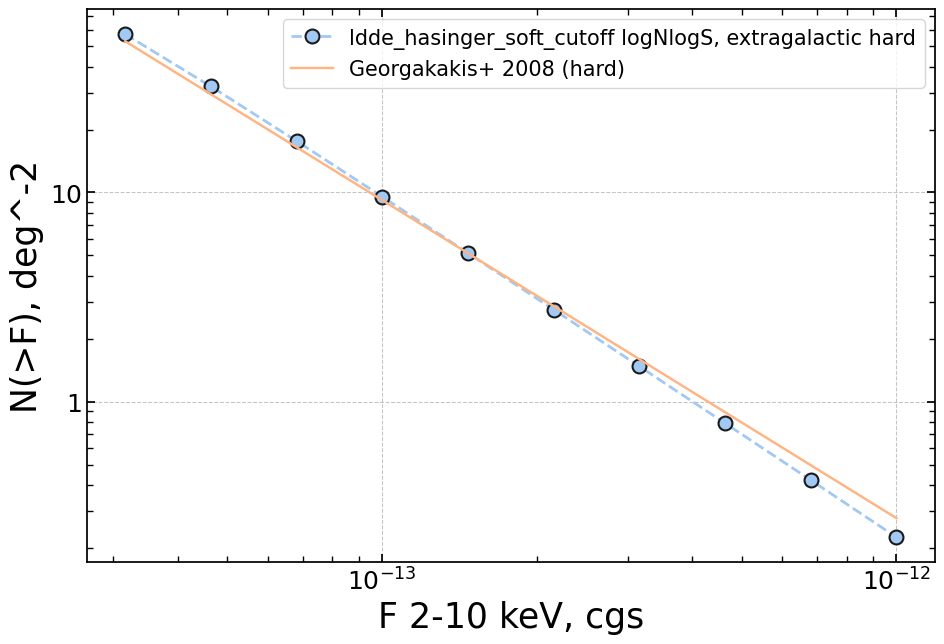

In [7]:
#%matplotlib auto
xlf_hard = XrayLuminosityFunction(xlf=ldde_aird_hard)

fig,  ax =  plt.subplots( figsize = (10,7), sharex=False)

Sarr = np.logspace(-13.5, -12, 10)
_, logNlogS_hard = xlf_hard.logNlogS(Sarr)

ax.loglog(Sarr, logNlogS_hard, 'o--', lw=2, label=f'{xlf_soft.name} logNlogS, extragalactic hard')
ax.loglog(Sarr,G08_best_fit_hard(Sarr),'-',label='Georgakakis+ 2008 (hard)')

ax.set_xlabel('F 2-10 keV, cgs')
ax.set_ylabel('N(>F), deg^-2')
ax.legend()
fig.tight_layout()
fig.savefig(path2plots+'AGN_logNlogS_hard.png')

## Linear bias factor

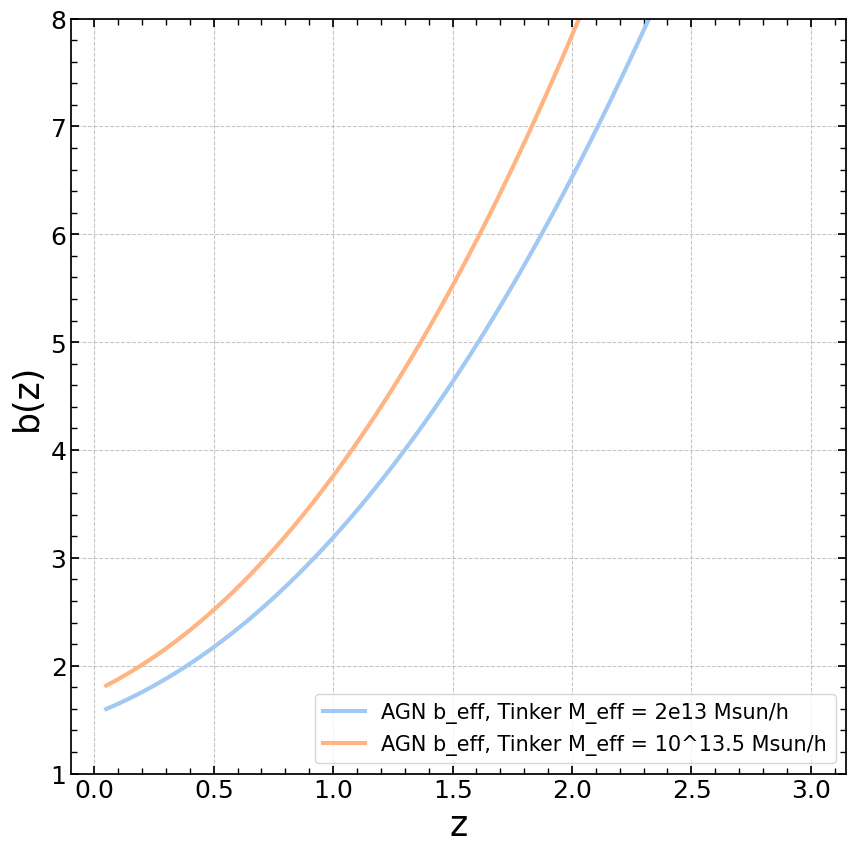

In [8]:
zarr = np.linspace(0.05, 3, 100)
xlf_soft=XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff, m_dmh=2e13)
zarr, b_eff = xlf_soft.b_eff(zarr)
h = xlf_soft.cosmo['h']

fig, ax  = plt.subplots(figsize=(10, 10))
plt.plot(zarr, b_eff, label=f'AGN b_eff, Tinker M_eff = 2e13 Msun/h', lw = 3)


xlf_soft=XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff, m_dmh=10**13.5)
zarr, b_eff = xlf_soft.b_eff(zarr)
plt.plot(zarr, b_eff, label=f'AGN b_eff, Tinker M_eff = 10^{13.5} Msun/h', lw = 3)



plt.xlabel('z')
plt.ylabel('b(z)')
plt.legend(loc='lower right')
ax.set_ylim(1,8)
fig.savefig(path2plots+'AGN_b_eff.png')



## Dependence on cosmology 

dNdz calculating: 100%|██████████| 100/100 [00:00<00:00, 172.06it/s]


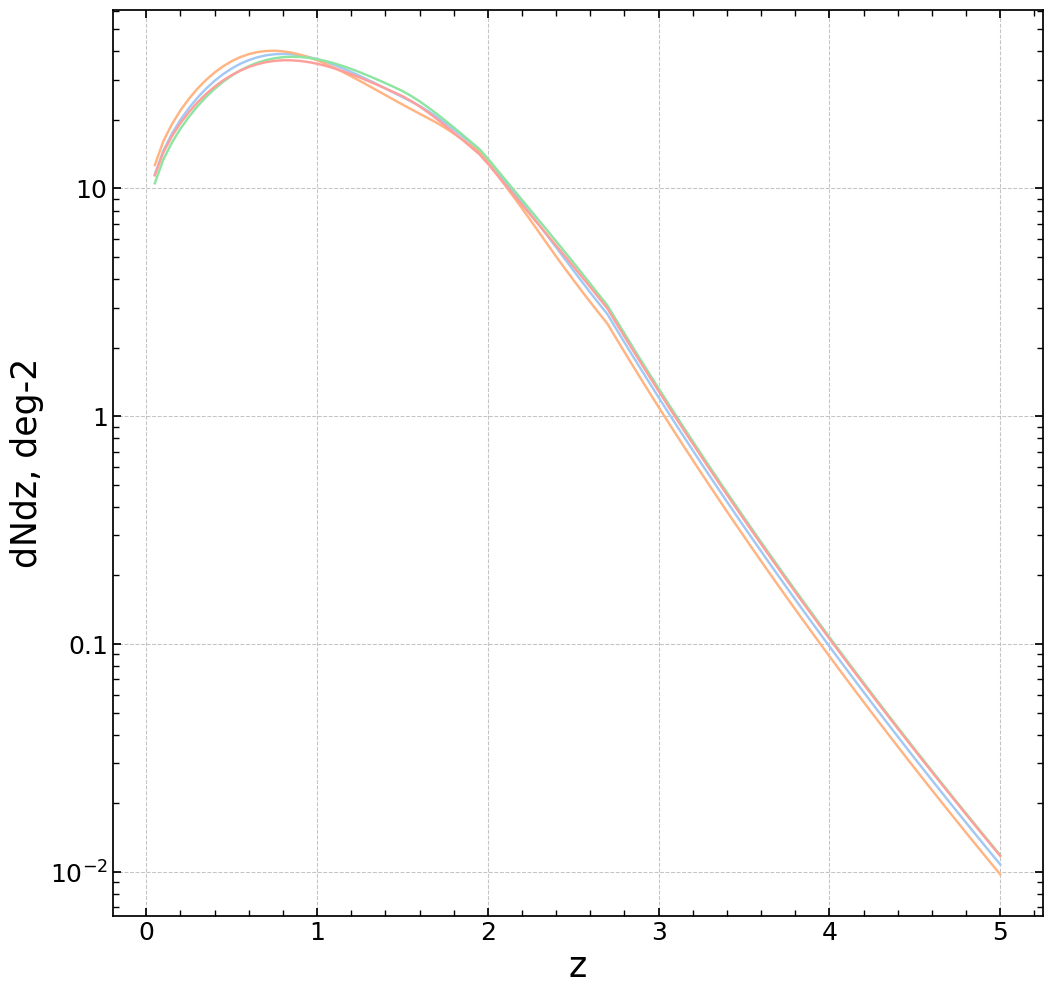

In [9]:
import pyccl as ccl
cosmo1 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7,  n_s=0.96, sigma8=0.8)
cosmo2 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.65,  n_s=0.96, sigma8=0.8)
cosmo3 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.75,  n_s=0.96, sigma8=0.8)
cosmo4 = ccl.Cosmology(Omega_c=0.35, Omega_b=0.05, h=0.7,  n_s=0.96, sigma8=0.8)
cosmo5 = ccl.Cosmology(Omega_c=0.45, Omega_b=0.05, h=0.7,  n_s=0.96, sigma8=0.8)

zarr = np.linspace(0.05, 5, 100)
fig,  ax =  plt.subplots( figsize = (12,12))
cosmos = [cosmo1, cosmo2, cosmo3, cosmo4]
for cosmo in cosmos:
    xlf_soft=XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff,cosmo=cosmo)
    xlf_soft.dNdz(Slim = Slim_soft, zarr = zarr, plot_ax=ax);


ax.set_xlabel('z')
ax.set_ylabel('dNdz, deg-2')
#ax.legend([cosmo.__str__() for cosmo in cosmos],fontsize = 10)


fig.savefig(path2plots+'AGN_dndz_cosmology.png')